In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os,sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

os.chdir('..')

In [3]:
from src.data_preprocess import DataPreProcessor
preprocessor = DataPreProcessor()

df = preprocessor.fetch_preprocessed_data()



Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


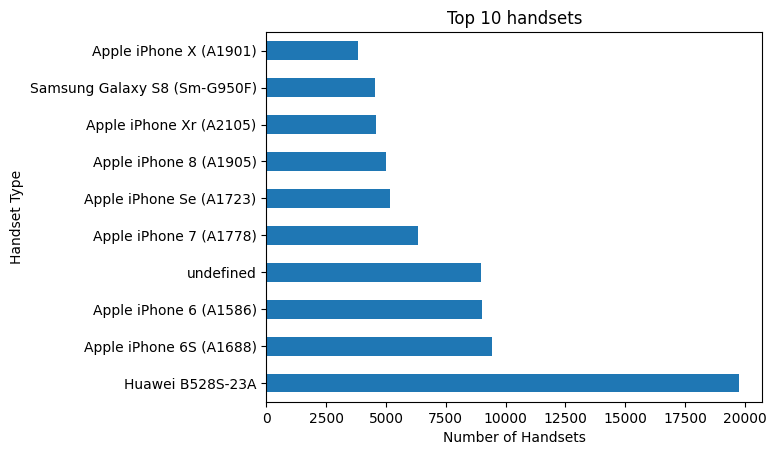

In [16]:
top_10_handsets = df['Handset Type'].value_counts().head(10)
ax = top_10_handsets.plot(kind='barh', title='Top 10 handsets')

ax.set_xlabel('Number of Handsets'); ax.set_ylabel('Handset Type')

print(top_10_handsets)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


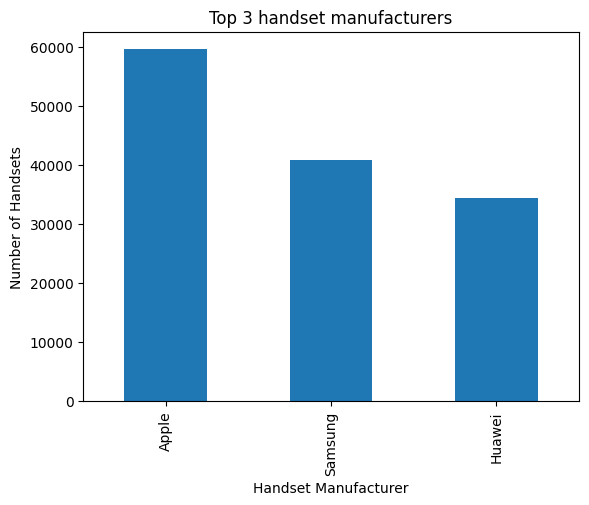

In [17]:
top_3_handsets_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
ax = top_3_handsets_manufacturers.plot(kind='bar', title='Top 3 handset manufacturers')

ax.set_xlabel('Handset Manufacturer'); ax.set_ylabel('Number of Handsets')
print(top_3_handsets_manufacturers)


Axes(0.125,0.11;0.775x0.77)


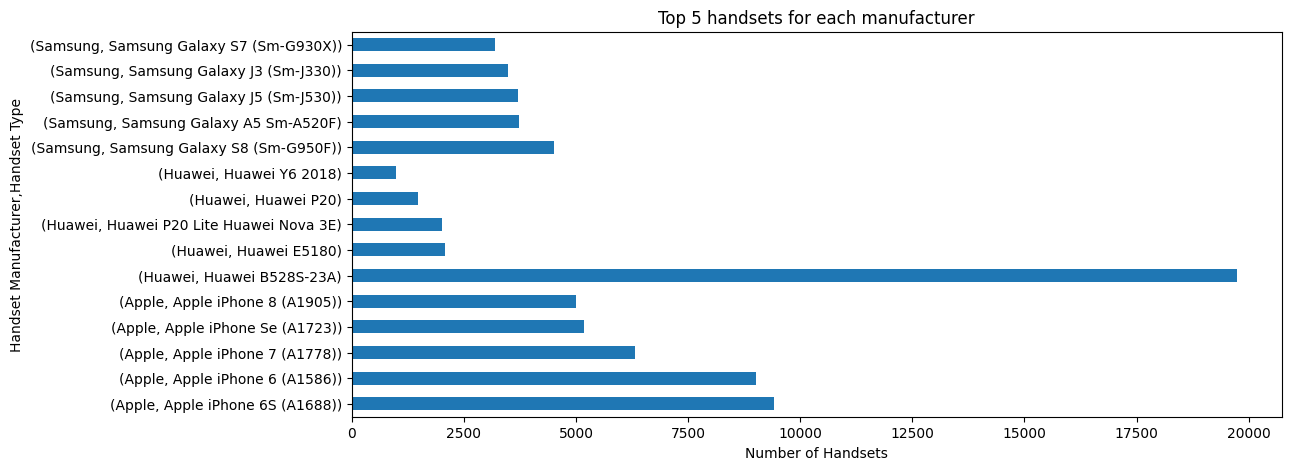

In [19]:
filtered_df = df[df['Handset Manufacturer'].isin(top_3_handsets_manufacturers.index.tolist())]

ax = filtered_df.groupby('Handset Manufacturer')['Handset Type']\
    .value_counts()\
    .groupby(level=0, group_keys=False)\
    .nlargest(5) \
    .plot(kind='barh', figsize=(12,5), title='Top 5 handsets for each manufacturer')

ax.set_xlabel('Number of Handsets')
print(ax)


In [7]:
grouped_data = df.groupby('MSISDN/Number')

aggregated_data = grouped_data.agg({
    'Bearer Id': 'count',                     
    'Dur. (ms)': 'sum',                        
    'Total DL (Bytes)': 'sum',                
    'Total UL (Bytes)': 'sum',              
    'Social Media DL (Bytes)': 'sum',         
    'Social Media UL (Bytes)': 'sum',        
    'Google DL (Bytes)': 'sum',           
    'Google UL (Bytes)': 'sum',           
    'Email DL (Bytes)': 'sum',               
    'Email UL (Bytes)': 'sum',          
    'Youtube DL (Bytes)': 'sum',             
    'Youtube UL (Bytes)': 'sum',              
    'Netflix DL (Bytes)': 'sum',              
    'Netflix UL (Bytes)': 'sum',             
    'Gaming DL (Bytes)': 'sum',              
    'Gaming UL (Bytes)': 'sum',             
    'Other DL (Bytes)': 'sum',                
    'Other UL (Bytes)': 'sum'                
})

aggregated_data.columns = ['Num_of_xDR_sessions', 'Session_duration', 'Total_DL', 'Total_UL',
                           'Social_Media_DL', 'Social_Media_UL', 'Google_DL', 'Google_UL',
                           'Email_DL', 'Email_UL', 'Youtube_DL', 'Youtube_UL',
                           'Netflix_DL', 'Netflix_UL', 'Gaming_DL', 'Gaming_UL',
                           'Other_DL', 'Other_UL']

print(aggregated_data.head())


               Num_of_xDR_sessions  Session_duration      Total_DL  \
MSISDN/Number                                                        
3.360100e+10                     1          116720.0  8.426375e+08   
3.360100e+10                     1          181230.0  1.207552e+08   
3.360100e+10                     1          134969.0  5.566597e+08   
3.360101e+10                     1           49878.0  4.019932e+08   
3.360101e+10                     2           37104.0  1.363130e+09   

                 Total_UL  Social_Media_DL  Social_Media_UL   Google_DL  \
MSISDN/Number                                                             
3.360100e+10   36053108.0        2206504.0          25631.0   3337123.0   
3.360100e+10   36104459.0        2598548.0          62017.0   4197697.0   
3.360100e+10   39306820.0        3148004.0          47619.0   3343483.0   
3.360101e+10   20327526.0         251469.0          28825.0   5937765.0   
3.360101e+10   94280527.0        2861230.0          51312.0

In [8]:
#Analzing the basic metrics in the dataset

mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode()

print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("Mode values:")
print(mode_values)


Mean values:
Bearer Id                                   1.013887e+19
Start ms                                    4.991882e+02
End ms                                      4.988009e+02
Dur. (ms)                                   1.046086e+05
IMSI                                        2.082016e+14
MSISDN/Number                               4.188282e+10
IMEI                                        4.847455e+13
Avg RTT DL (ms)                             1.097957e+02
Avg RTT UL (ms)                             1.766288e+01
Avg Bearer TP DL (kbps)                     1.330005e+04
Avg Bearer TP UL (kbps)                     1.770429e+03
TCP DL Retrans. Vol (Bytes)                 2.080991e+07
TCP UL Retrans. Vol (Bytes)                 7.596587e+05
DL TP < 50 Kbps (%)                         9.284475e+01
50 Kbps < DL TP < 250 Kbps (%)              3.069355e+00
250 Kbps < DL TP < 1 Mbps (%)               1.717341e+00
DL TP > 1 Mbps (%)                          1.609654e+00
UL TP < 10 Kbps (%

In [9]:

date_columns = ['Start', 'End']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  

non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

numeric_df = df.select_dtypes(include=['number'])


variance_values = numeric_df.var()
std_deviation_values = numeric_df.std()


print("Variance values:")
print(variance_values)
print("\nStandard deviation values:")
print(std_deviation_values)


Non-numeric columns: Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')
Variance values:
Bearer Id                                   8.315146e+36
Start ms                                    8.329624e+04
End ms                                      8.299970e+04
Dur. (ms)                                   6.567052e+09
IMSI                                        4.599834e+20
MSISDN/Number                               5.947410e+24
IMEI                                        5.005776e+26
Avg RTT DL (ms)                             3.128642e+05
Avg RTT UL (ms)                             5.856831e+03
Avg Bearer TP DL (kbps)                     5.746471e+08
Avg Bearer TP UL (kbps)                     2.139377e+07
TCP DL Retrans. Vol (Bytes)                 1.374418e+16
TCP UL Retrans. Vol (Bytes)                 2.488873e+14
DL TP < 50 Kbps (%)                         1.691358e+02
50 Kbps < DL TP < 250 Kbps (%)              3.843


Variable: Dur. (ms)
count    1.500010e+05
mean     1.046086e+05
std      8.103735e+04
min      7.142000e+03
25%      5.744200e+04
50%      8.639900e+04
75%      1.324300e+05
max      1.859336e+06
Name: Dur. (ms), dtype: float64


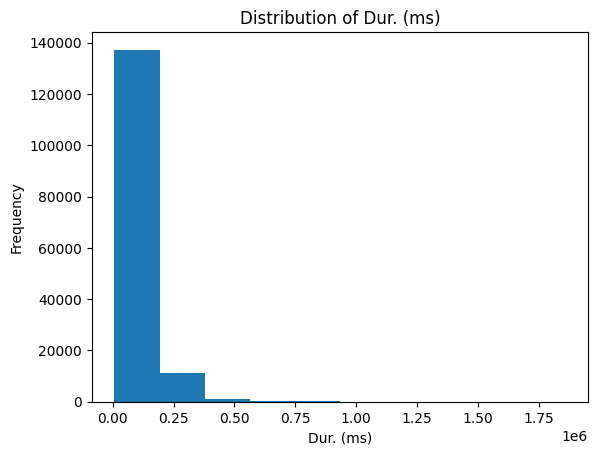


Variable: Avg RTT DL (ms)
count    150001.000000
mean        109.795706
std         559.342620
min           0.000000
25%          35.000000
50%          54.000000
75%         109.795706
max       96923.000000
Name: Avg RTT DL (ms), dtype: float64


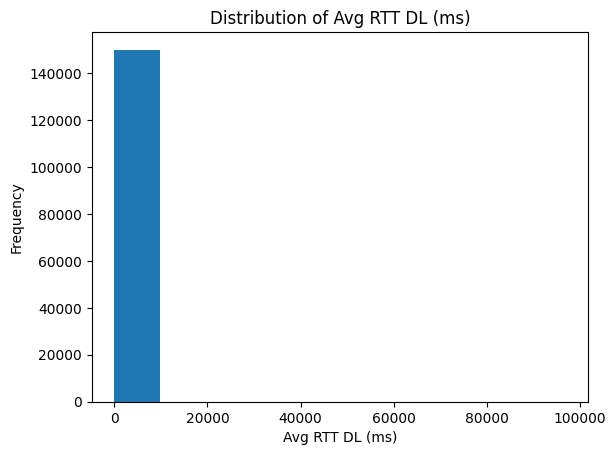


Variable: Avg RTT UL (ms)
count    150001.000000
mean         17.662883
std          76.529933
min           0.000000
25%           3.000000
50%           7.000000
75%          17.662883
max        7120.000000
Name: Avg RTT UL (ms), dtype: float64


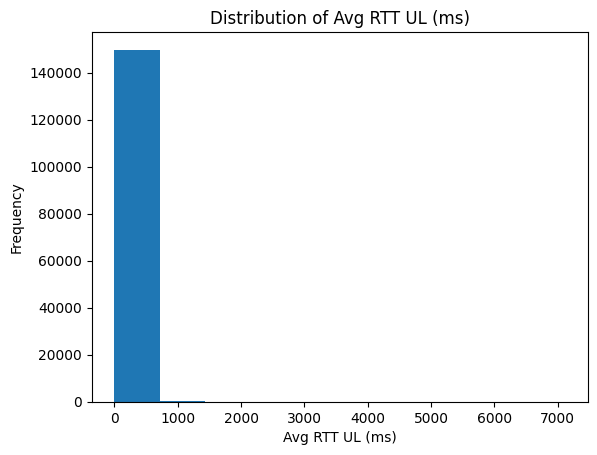


Variable: Total DL (Bytes)
count    1.500010e+05
mean     4.546434e+08
std      2.441421e+08
min      7.114041e+06
25%      2.431072e+08
50%      4.558409e+08
75%      6.657051e+08
max      9.029696e+08
Name: Total DL (Bytes), dtype: float64


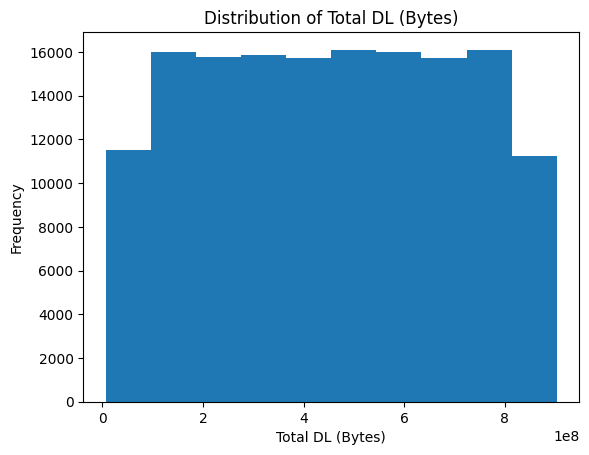


Variable: Total UL (Bytes)
count    1.500010e+05
mean     4.112121e+07
std      1.127635e+07
min      2.866892e+06
25%      3.322203e+07
50%      4.114324e+07
75%      4.903424e+07
max      7.833131e+07
Name: Total UL (Bytes), dtype: float64


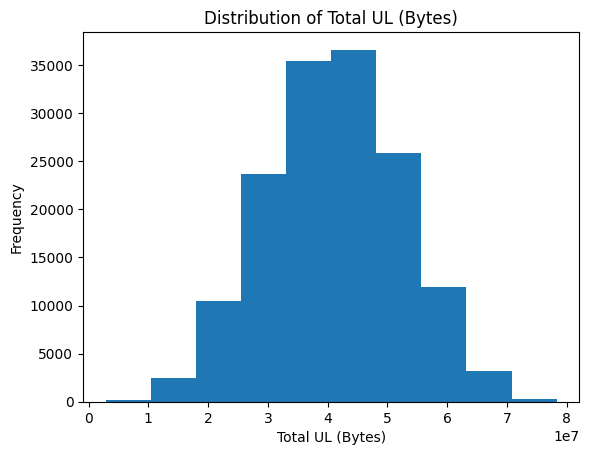

In [10]:

numerical_vars = [
    'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)'
]

# Iterate through each numerical variable
for var in numerical_vars:
  # Descriptive statistics (optional)
  print(f"\nVariable: {var}")
  print(df[var].describe())  # View summary statistics (mean, median, etc.)
  
  plt.hist(df[var])
  plt.xlabel(var)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {var}")
  plt.show()






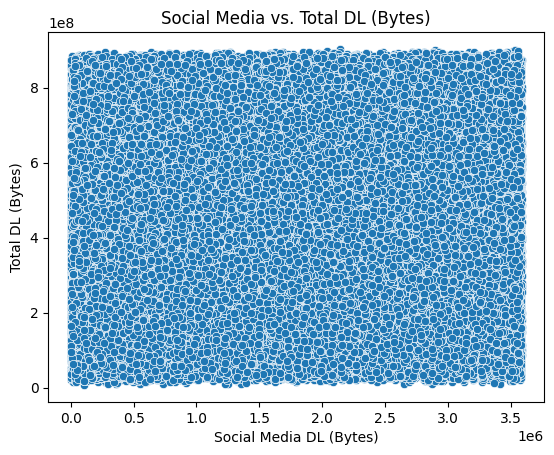

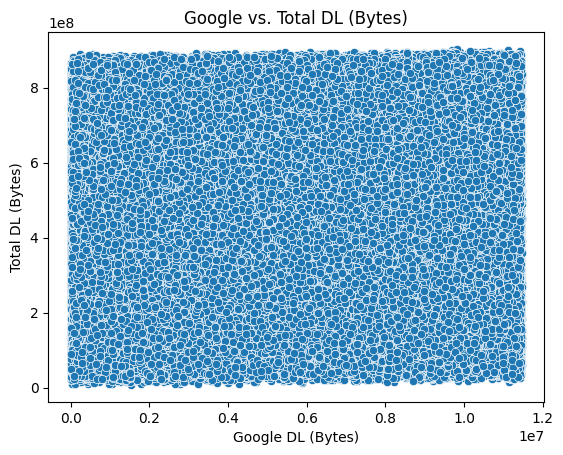

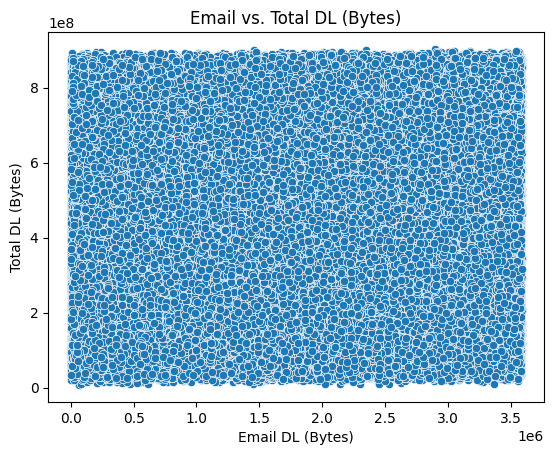

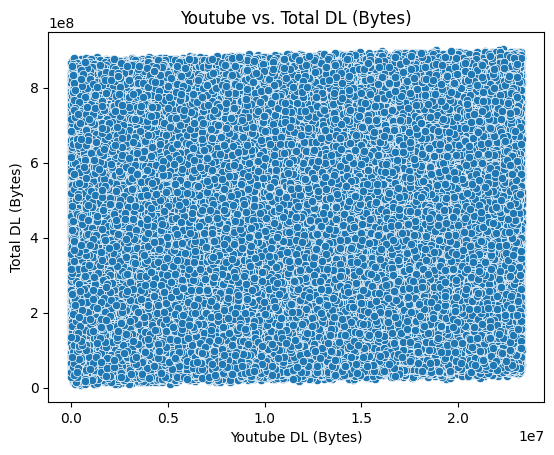

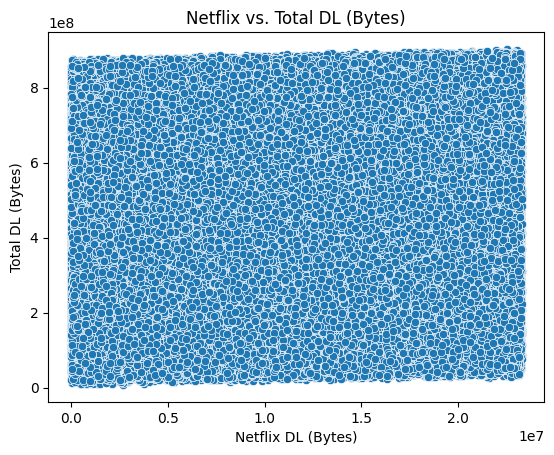

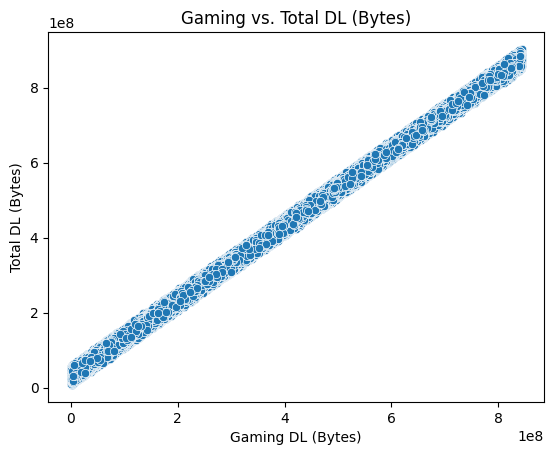

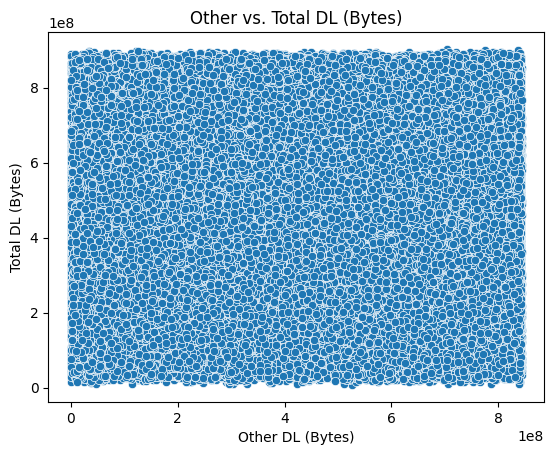

In [11]:
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in applications:
    sns.scatterplot(x=app + ' DL (Bytes)', y='Total DL (Bytes)', data=df)
    plt.xlabel(app + ' DL (Bytes)')
    plt.ylabel('Total DL (Bytes)')
    plt.title(app + ' vs. Total DL (Bytes)')
    plt.show()
    


In [12]:

session_duration_column = 'Dur. (ms)'

df['Decile'] = pd.qcut(df[session_duration_column], q=5, labels=['1st', '2nd', '3rd', '4th', '5th'])

total_data_per_decile = df.groupby('Decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

print(total_data_per_decile)



        Total DL (Bytes)  Total UL (Bytes)
Decile                                    
1st         1.364976e+13      1.234287e+12
2nd         2.165754e+13      1.962431e+12
3rd         5.582355e+12      5.067274e+11
4th         1.362117e+13      1.232582e+12
5th         1.368615e+13      1.232194e+12


/var/folders/14/f3j86z751wb6b5yyjr_10z0c0000gn/T/ipykernel_44428/1587889092.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data_per_decile = df.groupby('Decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()


In [13]:

correlation_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                         'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                         'Other DL (Bytes)']].corr()

# print(correlation_matrix)
correlation_matrix.describe()


,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.143818,0.142334,0.143906,0.143348,0.141726,0.141713,0.142368
std,0.377554,0.378198,0.377506,0.377751,0.378473,0.378472,0.378200
min,-0.001954,-0.002557,-0.000444,-0.001861,-0.006000,-0.003201,-0.006000
25%,-0.001603,-0.001688,0.000006,-0.000093,-0.002509,-0.002226,-0.002574
50%,0.001018,-0.000039,0.001351,0.001679,0.000548,-0.001421,-0.000444
75%,0.005435,0.001154,0.003212,0.001901,0.001277,0.000534,0.004084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                         'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                         'Other DL (Bytes)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns])

pca = PCA(n_components=4)  
pca_result = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

component_contribution = pd.DataFrame(
    pca.components_,
    columns=columns,
    index=[f"PC{i+1}" for i in range(4)]
)

explained_variance

array([0.14439453, 0.14355429, 0.14328287, 0.14284239])